In [5]:
import glob
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick

from os import listdir

Model	MSO44

Waveform Type	ANALOG

Horizontal Units	s

Sample Interval	4.00E-08

Record Length 1,000,000 pts

Zero Index 142999.57612500

Vertical Units	V

ANALOG_Thumbnail	
	

In [ ]:
# My local paths TODO Can git lfs resolve this?
### Laptop path ###
filepath_above_breakdown = 'csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/'
filenames_above_breakdown = glob.glob(filepath_above_breakdown+'*.csv')
### CSU Machine path ###
#filepath_above_breakdown = '../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/'
#filenames_above_breakdown = glob.glob(filepath_above_breakdown+'*.csv')

candidate_count_abd = 0
window_size = 1e-6    # Desired window size of 1 mus
# TODO Automatically get this from csv header
sample_interval = 4e-8
steps_in_window = int(window_size / sample_interval)
time_buffer = math.ceil(steps_in_window / 2)
candidate_threshold = 2 # nV*s
integrals = []
candidate_integrals = []
# Loop files 
for file_abd in filenames_above_breakdown:
    print('Looping file', file_abd)
    trace = np.loadtxt(file_abd,delimiter=',', skiprows=10)
    time    = trace[:,0]
    voltage = trace[:,1]*1e9 # Convert to nV for integral (want nV*s)
    start_index = 0
    while start_index < (len(time) - steps_in_window):
        window_integral = np.trapz(voltage[start_index:(start_index+steps_in_window)], x=time[start_index:(start_index+steps_in_window)])
        if math.isinf(window_integral):
            print('Inf found in range', start_index, 'to', start_index+steps_in_window)
        integrals.append(window_integral)
        if window_integral > candidate_threshold:
            candidate_count_abd += 1
            candidate_integrals.append(window_integral)
            # If candidate is found, shift the window forward to avoid multi-counting
            start_index += time_buffer
        else:
            start_index += 1
            
    print('Canddiate count after this file:', candidate_count_abd)
            
print('Found', candidate_count_abd, 'candidates above breakdown')

Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/trace_ch4_20220607144435713.csv
Inf found in range 80583 to 80608
Inf found in range 80596 to 80621
Inf found in range 115592 to 115617
Inf found in range 115605 to 115630
Inf found in range 335470 to 335495
Inf found in range 335483 to 335508
Inf found in range 335496 to 335521
Inf found in range 646477 to 646502
Inf found in range 646490 to 646515
Inf found in range 794536 to 794561
Inf found in range 794549 to 794574
Inf found in range 794562 to 794587
Inf found in range 794580 to 794605
Inf found in range 794581 to 794606
Inf found in range 794582 to 794607
Inf found in range 794583 to 794608
Inf found in range 794584 to 794609
Inf found in range 794585 to 794610
Inf found in range 794586 to 794611
Inf found in range 794587 to 794612
Inf found in range 794588 to 794613
Inf found in range 794589 to 794614
Inf found in range 794590 to 794615
Inf found in range 794591 to 794616
Inf found in range 79459

/home/lartpc/anaconda3/envs/dune_fd_pds/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


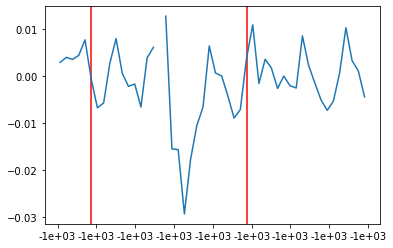

In [38]:
### Test ranges ###
# 80500:80700, window 80583 to 80608
# 115600:115650, window 115605 to 115630
# 335450:335550, window 335470 to 335495
filepath_above_breakdown = '../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias/'
filenames_above_breakdown = glob.glob(filepath_above_breakdown+'*.csv')
test_trace = np.loadtxt(filenames_above_breakdown[0] ,delimiter=',', skiprows=10)
test_time = test_trace[:,0]*1e6
test_voltage = test_trace[:,1]
left_index = 115600
right_index = 115650
left_window_index = 115605
right_window_index = 115630
plt.axvline(test_time[left_window_index], color='r')
plt.axvline(test_time[right_window_index], color='r')
plt.plot(test_time[left_index:right_index], test_voltage[left_index:right_index])
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%1.0e')) 

In [12]:
for v in test_voltage[80583:80608]:
    print(v)

-0.0047765625
-0.00631875
-0.0011421875
0.00015
-0.0023734375
-0.0016078125
-0.0010546875
0.0015828125
0.013415625
0.010646875
0.0093890625
0.0510984375
inf
inf
inf
inf
0.0552703125
inf
0.0460390625
0.040465625
0.0409875
0.0312375
0.030396875
0.0348
0.0284734375


In [5]:
filepath_below_breakdown = '../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/'
filenames_below_breakdown = glob.glob(filepath_below_breakdown+'*.csv')

candidate_count_bbd = 0
window_size = 1e-6    # Desired window size of 1 mus
# TODO Automatically get this from csv header
sample_interval = 4e-8
steps_in_window = int(window_size / sample_interval)
time_buffer = math.ceil(steps_in_window / 2)
candidate_threshold = 2 # nV*s
# Loop files 
for file_bbd in filenames_below_breakdown:
    print('Looping file', file_bbd)
    trace = np.loadtxt(file_bbd,delimiter=',', skiprows=10)
    time    = trace[:,0]
    voltage = trace[:,1]*1e9 # Convert to nV for integral (want nV*s)
    start_index = 0
    while start_index < (len(time) - steps_in_window):
        window_integral = np.trapz(voltage[start_index:(start_index+steps_in_window)], x=time[start_index:(start_index+steps_in_window)])
        if window_integral > candidate_threshold:
            candidate_count_bbd += 1
            # If candidate is found, shift the window forward to avoid multi-counting
            start_index += time_buffer
        else:
            start_index += 1
            
    print('Canddiate count after this file:', candidate_count_bbd)
            
print('Found', candidate_count_bbd, 'candidates below breakdown')

Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150151022.csv
Sample interval 4e-08
Steps in window 25
Canddiate count after this file: 8372
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150321808.csv
Sample interval 4e-08
Steps in window 25
Canddiate count after this file: 8377
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150051062.csv
Sample interval 4e-08
Steps in window 25
Canddiate count after this file: 9503
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150524078.csv
Sample interval 4e-08
Steps in window 25
Canddiate count after this file: 9503
Looping file ../csv/long_traces/10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias/trace_ch4_20220607150352676.csv
Sample interval 4e-08
Steps in window 25
Canddiate count after this file: 9530
Looping file ../csv/long_

In [4]:
# Integrate in window of length 1 microsecond in steps of 40 ns
#print(trace_time)
integrals = []
for i in range(0, len(trace_time)-steps_in_window):
    # Factor of 1e3 converts microseconds to nanoseconds 
    # Factor of 1e-3 converts mV to V
    integrals.append(np.trapz(voltage[i:i+steps_in_window]*1e-3, x=trace_time[i:i+steps_in_window])*1e3)
    if integrals[i] > 2: # 2 ns*V indicates single photon peak
        print('Hey look a thing')

Left window edge: -5.710885e-06
Right window edge: -4.710885e-06
Window length in microseconds: 9.999999999999997e-07


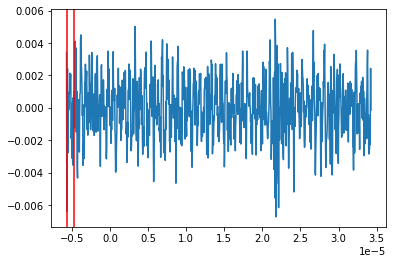

In [17]:
# Plot integration window for sanity check
# TODO Calculate steps_in_window rather than hard code
#steps_in_window = 250
print('Left window edge:', time[0])
print('Right window edge:', time[steps_in_window])
print('Window length in microseconds:', time[steps_in_window] - time[0])
plt.plot(time, voltage)
plt.axvline(time[0], color='r')
plt.axvline(time[steps_in_window], color='r')